<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Magnetic-fields" data-toc-modified-id="Magnetic-fields-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Magnetic fields</a></span></li></ul></li></ul></li><li><span><a href="#The-problem" data-toc-modified-id="The-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#The-data" data-toc-modified-id="The-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The data</a></span></li><li><span><a href="#The-method" data-toc-modified-id="The-method-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The method</a></span><ul class="toc-item"><li><span><a href="#Broad-averaging" data-toc-modified-id="Broad-averaging-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Broad averaging</a></span><ul class="toc-item"><li><span><a href="#Averaging-over-the-entire-disk" data-toc-modified-id="Averaging-over-the-entire-disk-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Averaging over the entire disk</a></span></li><li><span><a href="#Within-3-scale-heights" data-toc-modified-id="Within-3-scale-heights-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Within 3 scale heights</a></span></li></ul></li><li><span><a href="#$n$-nearest-neighbours" data-toc-modified-id="$n$-nearest-neighbours-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>$n$ nearest neighbours</a></span><ul class="toc-item"><li><span><a href="#24-nearest-neighbours-in-2D" data-toc-modified-id="24-nearest-neighbours-in-2D-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>24 nearest neighbours in 2D</a></span></li><li><span><a href="#124-nearest-neighbours-in-3D" data-toc-modified-id="124-nearest-neighbours-in-3D-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>124 nearest neighbours in 3D</a></span></li></ul></li><li><span><a href="#Slow-Feature-Analysis" data-toc-modified-id="Slow-Feature-Analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Slow Feature Analysis</a></span></li></ul></li><li><span><a href="#Future-work" data-toc-modified-id="Future-work-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Future work</a></span></li><li><span><a href="#Useful-references" data-toc-modified-id="Useful-references-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Useful references</a></span></li></ul></div>

# Slow Feature Analysis of magnetic fields in a black hole accretion disk

## Introduction

At the centre of almost every massive galaxy lies a supermassive black hole. Contrary to popular belief, these are not objects of pure destruction but rather play a vital role in the complex system of birth, death, and rebirth within our Universe by recycling materials and controlling star formation in their host galaxies.

As gas and dust falls towards the black hole it naturally forms into a co-rotating disk which then heats to become plasma. From here, there are three possible outcomes for any individual parcel of plasma: (1) successfully accrete onto the black hole, (2) be ejected from the disk before accretion can occur, or (3) be diverted along the poles of the black hole to form jets. 

The specific path that any one parcel takes can have a significant effect throughout the galactic neighbourhood, as seen in the images below. A major decider in this fate is the magnetic field within the disk.

<table>
    <tr>
        <td style="text-align:center">
            <img src='images/space/900px-ESO_Centaurus_A_LABOCA.jpeg' alt="A galaxy viewed edge-on against the night sky. Two jets, originating from the centre, stream away from the plane of the galaxy like plumes of smoke." width=300>
        </td>
        <td style="text-align:center">
            <img src='images/space/cena_csiro_900.jpeg' alt="Four large radio telescope dishes are in the foreground. Behind them, on the full night sky, are the jets of Centaurus A. The length of each jet is approximately 10 times the diameter of the full Moon. Combined, the two jets take up most of the night sky from horizon to zenith." width=300>
        </td>
    </tr>
    <tr>
        <td style="text-align:center">
            The jets produced by the black hole at the centre of galaxy Centaurus A, located ~10 million light years from Earth. <a href="https://www.eso.org/public/images/eso0903a/">(source)</a>
        </td>
        <td style="text-align:center">
            The full extent of the radio jets on the sky, with the full Moon for scale. <a href="https://apod.nasa.gov/apod/ap110413.html">(source)</a>
        </td>
    </tr>
</table>

#### Magnetic fields
The importance of the magnetic field of the accretion disk has been realised since [the early 90's](https://en.wikipedia.org/wiki/Magnetorotational_instability), but our ability to simulate these systems (and, hence, to understand them) has been limited by both computational power and the sophistication of our codes. To get around these constraints, we frequently employ simplifications to our mathematics.

One area where simplifications are common and necessary is in the study of magnetic dynamos.

**A magnetic dynamo is any mechanism which maintains or grows a magnetic field over time. If a magnetic field does not die as $t\rightarrow\infty$ then a magnetic dynamo is acting.**

As magnetic fields are required to produce jets and to permit the act of accretion itself, and since we observe both happening throughout our Universe over very long timescales, we know that a dynamo must be acting within black hole accretion disks. If we could understand this dynamo then we would be one step closer to predicting the growth and evolution of black holes and galaxies. The major challenge is how to study these fields.

Magnetic fields in accretion disks are highly turbulent and chaotic and this hinders our ability to study their behaviour or to predict their impact on other variables. Because of this, we would like to separate our magnetic field into two components: one large and "average", the other small and "varying". This is known as the [mean-field approximation](https://en.wikipedia.org/wiki/Mean-field_theory) and in mathematical terms, we write this as

\begin{equation}
B = \overline{B} + {b}
\end{equation}

where $\overline{B}$ is our slowly varying "average" component and $b$ is the quickly varying component.

Baked into this approach is the assumption that $\overline{B}$ is the main driver of behaviour. We assume that $b$ is merely noise and can be neglected without sacrificing too much predictive power.

## The problem

$\overline{B}$ is defined to be the "average" field, but an average over what?

In practice, the answer to this varies within the literature and there is not yet any agreed-upon definition for an appropriate average. 

Our disks are 3-dimensional objects, as we can see in the images below. Regions above and below the disk are likely not representative of the disk itself, so we may not want to include these regions when we calculate $\overline{B}$. We should also be mindful of the fact that our magnetic field is a vector and each component $(B_r,B_{\theta},B_{\phi})$ can be positive *or* negative — if we average over a region that is too large then we'll probably get a slowly varying value, but it'll be because $\overline{B}\sim0$, which means $\overline{B}$ should be insignificant and we're wasting our time by studying it instead of $b$.

<table>
    <tr>
        <td>
            <img src='images/density.png' alt="A slice halfway through the simulated accretion disk, showing the mass density of material. The material is denser around the disk plane, becoming wispy at greater heights above and below the disk. Plumes of material emanate from the black hole.">
        </td>
        <td>
            <img src='images/Bfield.png' alt="A slice halfway through the simulated accretion disk, showing the magnetic field strength in the r direction. It's a chaotic tangle of fields of opposing sign and varying strength.">
        </td>
    </tr>
    <tr>
        <td style="text-align:center">
            Gas/plasma density.
        </td>
        <td style="text-align:center">
            The r-component of the magnetic field, $B_r$.
        </td>
    </tr>
</table>

To answer this question, we need to investigate different methods of averaging in the disk and compare both the resultant $\overline{B}$ and how quickly that $\overline{B}$ varies over time (remember, $\overline{B}$ must be "slowly varying", whatever that means).

## The data

At each timestep, the simulation produces a $256^3$ grid of variables, including density, magnetic field vector, total energy, pressure, and momentum vector. The grid is defined by a spherical coordinate system $(r,\theta,\phi)$ in the physics convention, i.e. $\theta$ is the zenith angle and $\phi$ the azimuth:

<table>
    <tr>
        <td>
            <img src='images/1024px-3D_Spherical.png' alt="" width=300>
        </td>
    </tr>
    <tr>
        <td style="text-align:center">
            Spherical polar coordinates in the physics convention. From <a href="https://en.wikipedia.org/wiki/Spherical_coordinate_system">Wikipedia.</a>
        </td>
    </tr>
</table>

and spans $r\in[5r_g,145r_g]$, $\theta\in[0^c,\pi^c)$, and $\phi\in[0^c,2\pi^c)$ — i.e. a full sphere.

Since the equations used to generate the data are all highly non-linear, we cannot analyse our field data using linear methods unless we first linearise the data (using the method described above).

The nature of simulation also means there is very little pre-processing to do.

*Note: All data is given in computational units unless otherwise specified. These are generally non-dimensional, since we set the speed of light $c=1$ and the mass of the black hole $M=1$.*

<table>
    <tr>
        <td>
            <img src='images/vol_render.png' alt="" width=500>
        </td>
    </tr>
    <tr>
        <td style="text-align:center">
            A volume render of my simulation, viewed above at an angle, showing the higher density disk region. The black hole is located at the centre and is not simulated. Image produced using <a href="https://wci.llnl.gov/simulation/computer-codes/visit">VisIt.</a>
        </td>
    </tr>
</table>

## The method

I'll be comparing 3 different averaging techniques, with increasing complexity:

1. Broad averaging 
    - over the entire domain
    - within 3 scale heights of the disk (i.e. approximately within the envelope of the disk)
2. Averaging the n nearest neighbours
    - n=24 within the disk plane (i.e. in 2D)
    - n=124 in 3D
3. Slow Feature Analysis, a machine learning approach

Because the data is given in a custom format (```.athdf``` and ```.athdf.xdmf```) and the files are large (many GB), the non-executable code shown below is just for illustration of the method. The result of these methods is saved in the file object ```average_B.pkl```, so we can visualise and compare results without the long computational time. 

First, we'll import our data and some of the packages we'll need.

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_pickle('data/average_B.pkl')
time = sorted(list(data['times']))

Next, I'll define some functions that'll make plotting simpler later on.

In [2]:
def make_subplot_i(ax,x,y,reduce):
    for var in ['B1','B2','B3','Btot']:
        Y = y[var]
        if reduce==1:
            ax.plot(x[20:],Y[20:],label=var, alpha=0.5)
        else:
            ax.plot(x,Y,label=var, alpha=0.5)
        ax.set_xlabel('Time')
        
def make_subplot_sfa(ax,x,y,reduce):
    if reduce==1:
        ax.plot(x[20:],y[20:])
    else:
        ax.plot(x,y)
    ax.set_xlabel('Time')

Our data contains the following:

In [3]:
import pprint

# uncomment to see the complete dictionary 
#pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(data)

print(data.keys(),'\n')
print(data['times'],'\n')
print(data['raw'].keys(),'\n')
print(data['raw']['average'].keys())

dict_keys(['diff', 'prop_diff', 'raw', 'times']) 

[80.0, 715.0, 750.0, 160.0, 670.0, 635.0, 40.0, 790.0, 510.0, 320.0, 430.0, 200.0, 595.0, 370.0, 540.0, 290.0, 580.0, 250.0, 460.0, 130.0, 700.0, 745.0, 785.0, 10.0, 665.0, 620.0, 805.0, 440.0, 390.0, 270.0, 560.0, 480.0, 350.0, 645.0, 600.0, 30.0, 720.0, 765.0, 685.0, 110.0, 60.0, 180.0, 650.0, 615.0, 140.0, 690.0, 735.0, 770.0, 220.0, 410.0, 810.0, 300.0, 530.0, 760.0, 725.0, 150.0, 680.0, 190.0, 605.0, 640.0, 70.0, 520.0, 310.0, 800.0, 400.0, 230.0, 490.0, 340.0, 570.0, 260.0, 450.0, 815.0, 380.0, 695.0, 100.0, 775.0, 730.0, 20.0, 610.0, 655.0, 470.0, 590.0, 240.0, 550.0, 280.0, 360.0, 630.0, 675.0, 795.0, 0.0, 755.0, 710.0, 120.0, 50.0, 780.0, 625.0, 660.0, 170.0, 90.0, 740.0, 705.0, 210.0, 585.0, 820.0, 420.0, 330.0, 500.0] 

dict_keys(['average', 'scaleheight', '2d', '3d']) 

dict_keys(['B1', 'B2', 'B3', 'Btot'])


Hence, we have:

 - For each magnetic field component (```B1```, ```B2```, ```B3```, ```Btot```), we average according to 4 different methods described below (```average```, ```scaleheight```, ```2d```, ```3d```).
 
 - With each component averaged 4 different ways, we then assess the quality of those methods by analysing the raw average result (```raw```), the absolute change in the average between timesteps (```diff```), and the percentage, or proportional, change between timesteps (```prop_diff```).
 
 - The time corresponding to each value in ```B1```, ```B2```, ```B3```, ```Btot```. Since the times are the same for all entries, this is only given once at the dictionary root.
 
So if we want to know the ```raw``` ```scaleheight``` average of ```B1``` over time, we would access this by

```python
data['raw']['scaleheight']['B1']
```

If we wanted to know the percentage difference (```prop_diff```) in the ```3d``` average of ```Btot``` over time, we would access this by

```python
data['prop_diff']['3d']['Btot']
```

In short, we follow the template

```python
data[<analysis method>][<averaging method>][<B component>]
```

### Broad averaging
By far the easiest and most common approach, it's also the most difficult to judge. It should naturally result in a value close to zero that varies slowly or not at all, but is it useful or physical to ascribe $\sim$100% of the magnetic field action to $b$? What does it mean for the dynamo if the average large-scale magnetic field is $\sim0$?

#### Averaging over the entire disk

To start, let's look at the magnetic field averaged over the entire computational domain. This includes regions far above and below the disk, which may not have much magnetic field at early times and which likely have little impact on the disk.

```python
B_av = np.ones_like(B)
B_av = B_av * np.average(B)
```

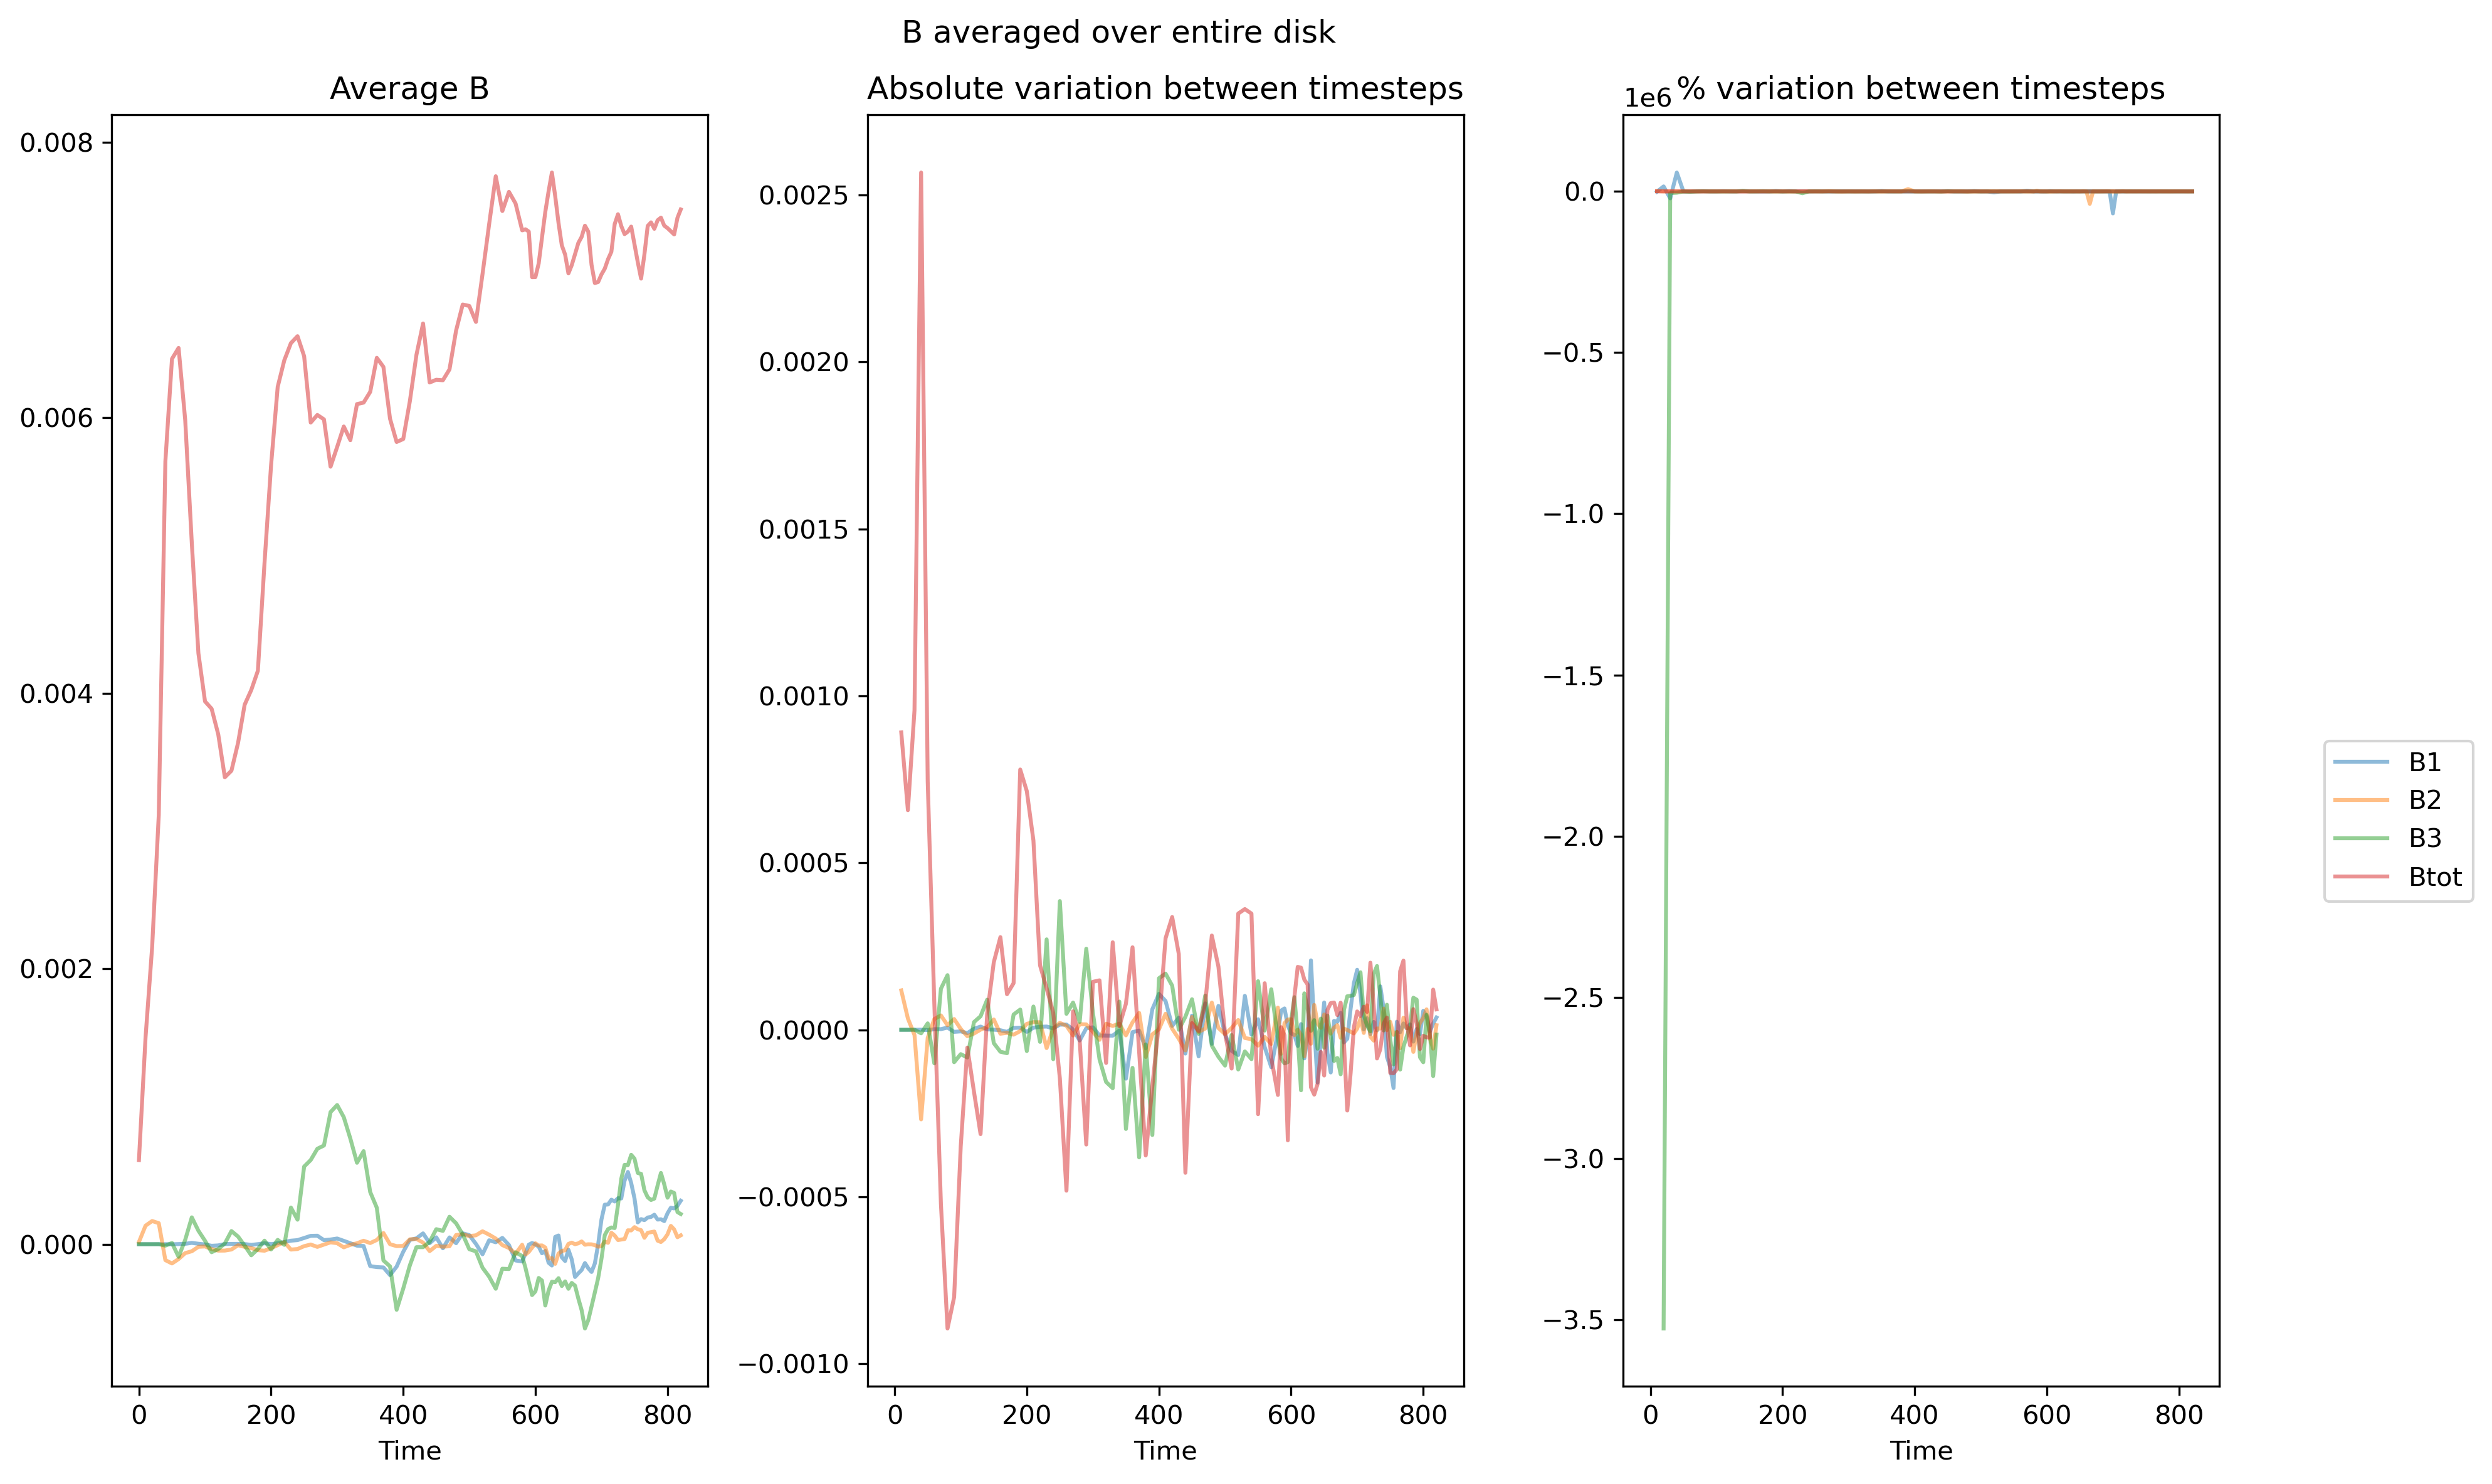

In [4]:
reduce = 0 # use full timeseries (for now)

fig, ax = plt.subplots(nrows=1,ncols=3,sharey='none',sharex='all',figsize=(12,8), dpi= 300)
# use our pre-defined function to plot all [B1,B2,B3,Btot]
make_subplot_i(ax[0],time,data['raw']['average'],reduce)
make_subplot_i(ax[1],time[1:],data['diff']['average'],reduce)
make_subplot_i(ax[2],time[1:],data['prop_diff']['average'],reduce)

ax[0].set_title('Average B')
ax[1].set_title('Absolute variation between timesteps')
ax[2].set_title('% variation between timesteps')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 0.5), loc='upper right', borderaxespad=0.)
fig.suptitle('B averaged over entire disk')
fig.tight_layout()

Perhaps the most useful metric will be the last plot, showing the percentage change in $\overline{B}$ with each time step, but in its current form it's dominated by an extreme change near $t=0$. This isn't unexpected – the simulation is started *near* equilibrium but can never meet it exactly, and so undergoes a period of rapid instability on start. This is just an unavoidable artefact of simulation and it has no physical meaning.

Technically, B3 is initially zero everywhere in the disk and is generated by B1 and B2 through the dynamo process, so a natural place to begin our analysis is $t\sim200$, when B3 first shows sustained growth. 

So throwing away those initial times:

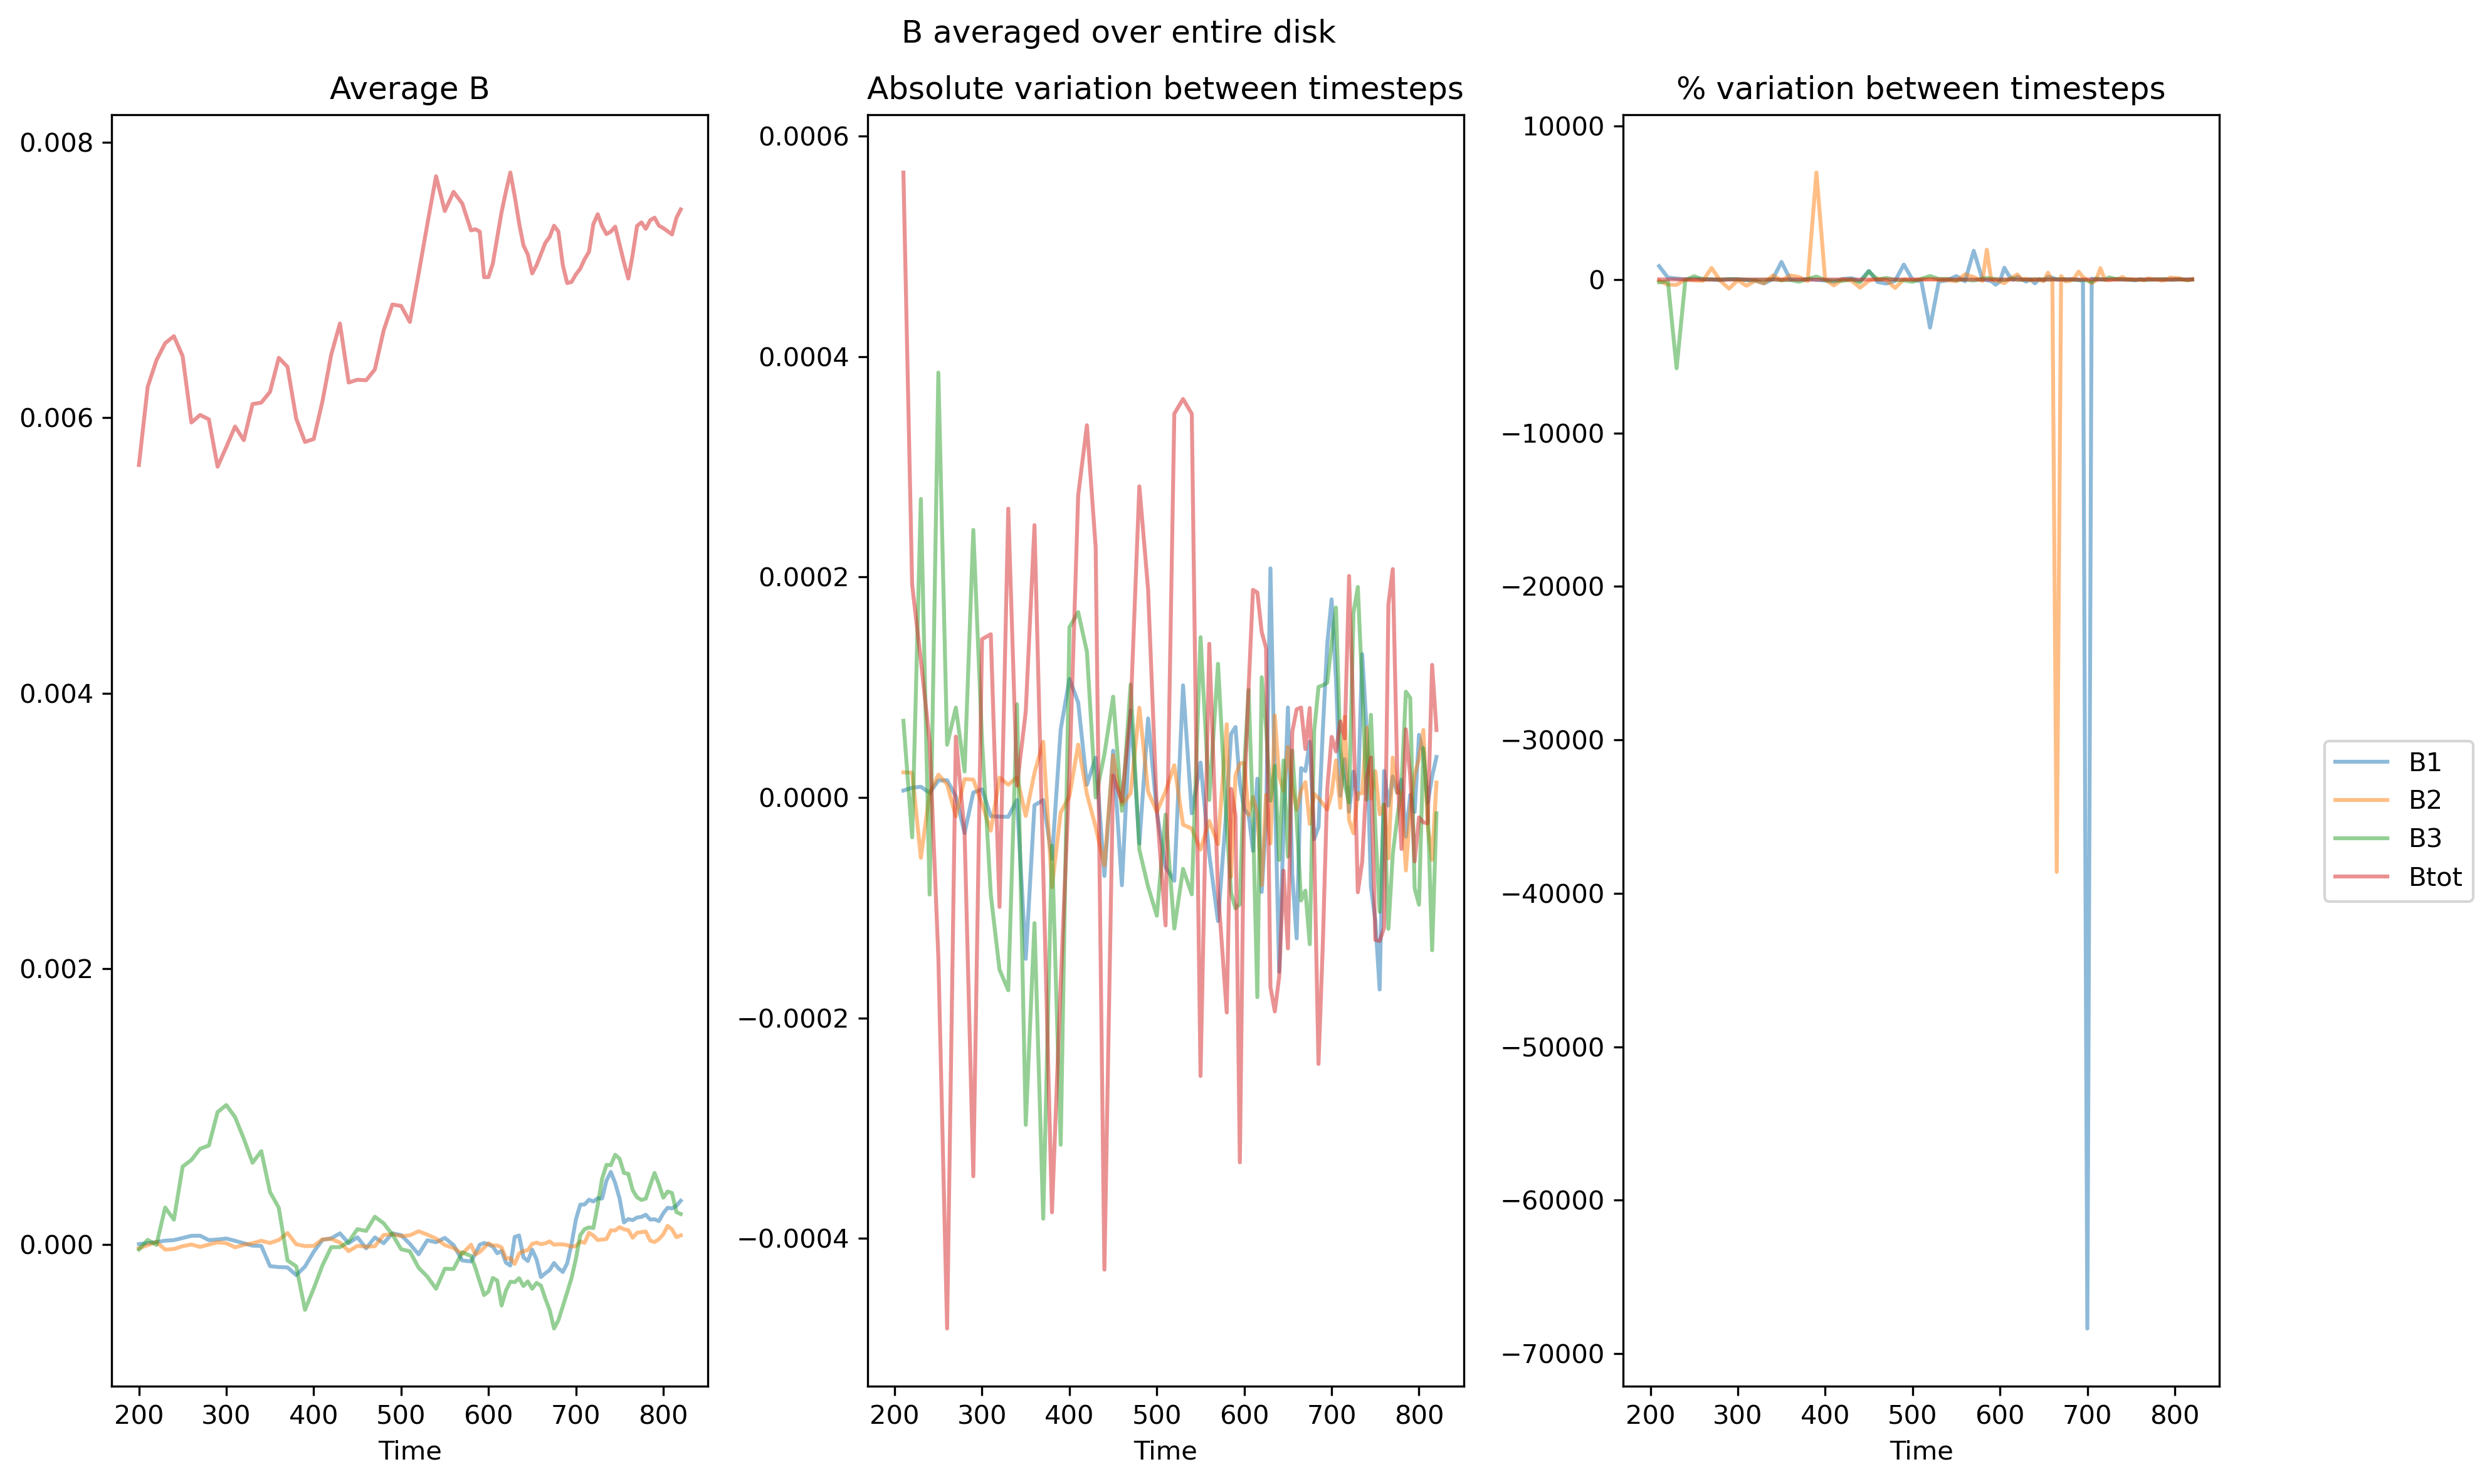

In [5]:
reduce = 1 # flag to remove initial times, see function make_subplot_i() for implementation

fig, ax = plt.subplots(nrows=1,ncols=3,sharey='none',sharex='all',figsize=(12,8), dpi= 300)
make_subplot_i(ax[0],time,data['raw']['average'],reduce)
make_subplot_i(ax[1],time[1:],data['diff']['average'],reduce)
make_subplot_i(ax[2],time[1:],data['prop_diff']['average'],reduce)

ax[0].set_title('Average B')
ax[1].set_title('Absolute variation between timesteps')
ax[2].set_title('% variation between timesteps')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 0.5), loc='upper right', borderaxespad=0.)
fig.suptitle('B averaged over entire disk')
fig.tight_layout()

Averaging $B$ in this way does give us a $\overline{B}$ close to zero in all individual components as expected (left plot), but there are also some large spikes in percentage difference (the RHS plot) at later times for B1 and B2.

We do expect Btot to be $>0$ on average since it is the sum of squares, but the very large discrepancy between Btot and the individual components suggests that our component averages are $\sim0$ only because they are cancelling each other out at large scales. 

#### Within 3 scale heights

```python
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

scale_height = 0.25
th_low = find_nearest(theta, np.pi/2 - 3.*scale_height)
th_high = find_nearest(theta, np.pi/2 + 3.*scale_height)

B_sh = np.ones_like(B)
B_sh = B_sh * np.average(B[:,th_low:th_high,:])
```

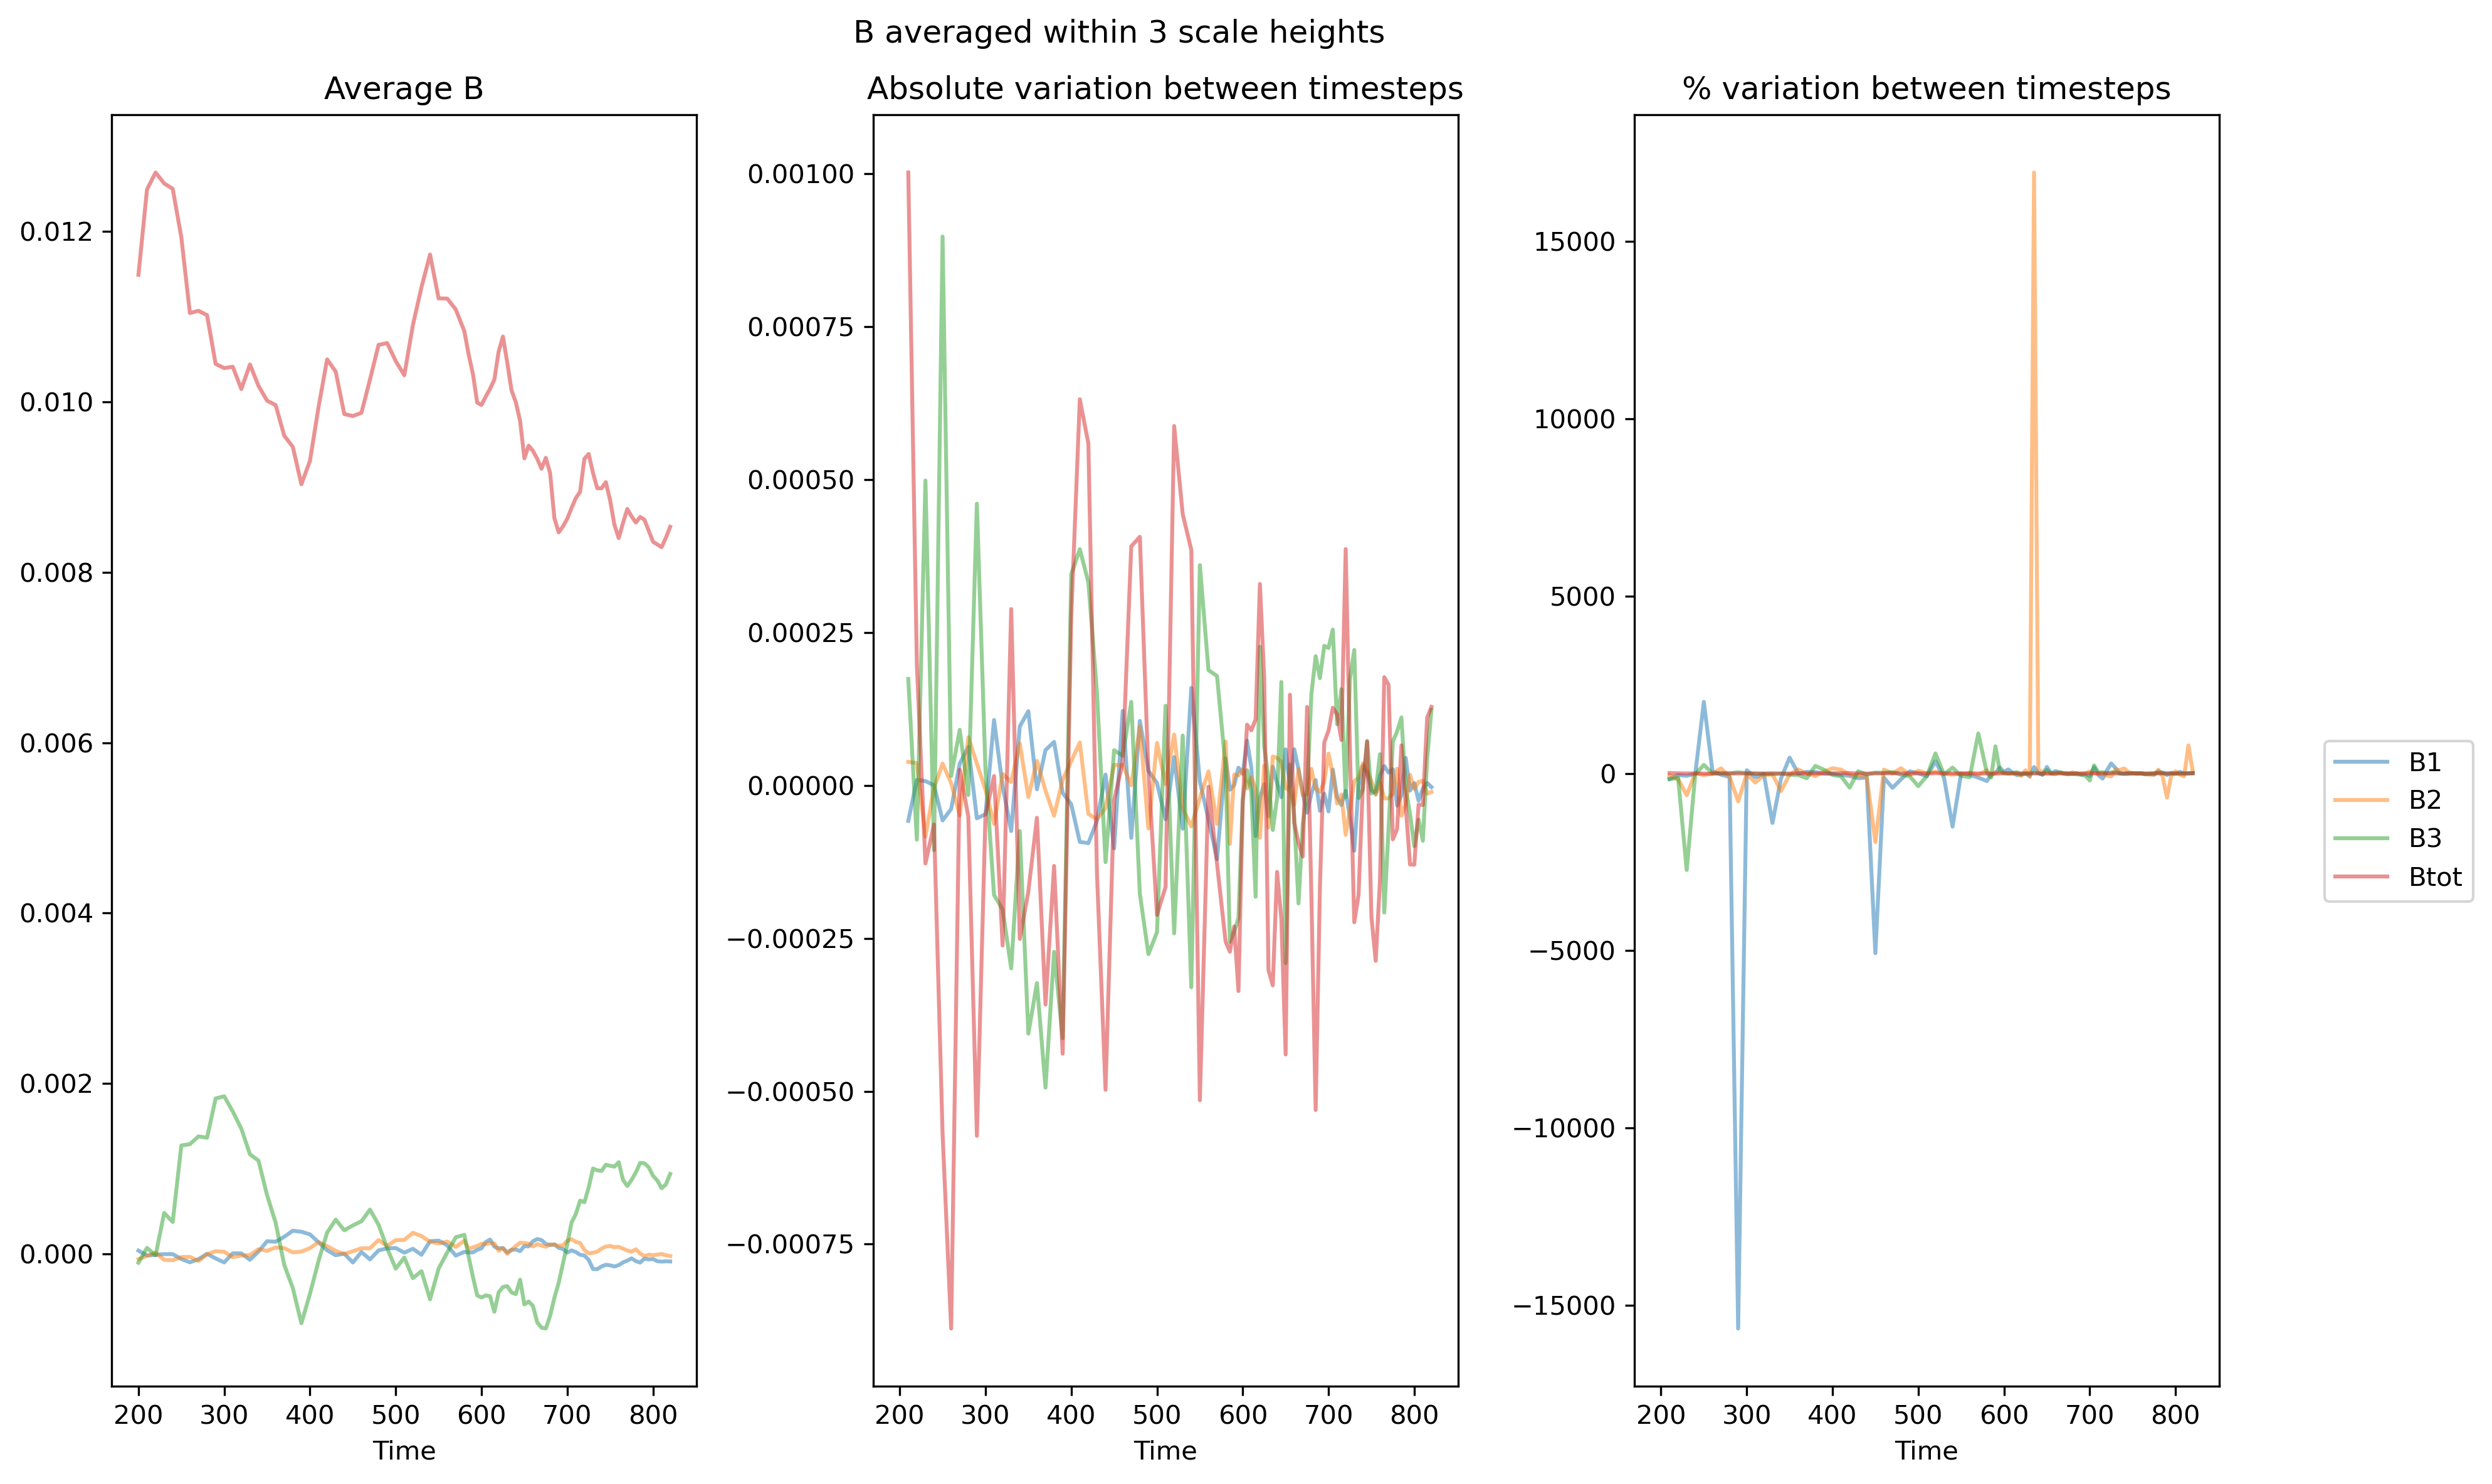

In [6]:
reduce = 1

fig, ax = plt.subplots(nrows=1,ncols=3,sharey='none',sharex='all',figsize=(12,8), dpi= 300)
make_subplot_i(ax[0],time,data['raw']['scaleheight'],reduce)
make_subplot_i(ax[1],time[1:],data['diff']['scaleheight'],reduce)
make_subplot_i(ax[2],time[1:],data['prop_diff']['scaleheight'],reduce)

ax[0].set_title('Average B')
ax[1].set_title('Absolute variation between timesteps')
ax[2].set_title('% variation between timesteps')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 0.5), loc='upper right', borderaxespad=0.)
fig.suptitle('B averaged within 3 scale heights')
fig.tight_layout()

It's interesting to see here that although the individual components of $B$ are following much the same track as in the ```average``` case, the total magnetic field $B_{\rm tot}$ now seems to be *decreasing*, albeit from a higher value. Perhaps the point at which these two meet ($\sim 0.008$) marks the time of first stability for the disk.

Again there are some large percentage variations on the right for the B1 and B2 components.

### $n$ nearest neighbours
For each pixel in my dataset, I take the average of the closest $n$ neighbours and assign this to my pixel. A schematic for the 24 nearest neighbours ($5^2 -1$) to the $i^{\rm th}$ cell in 2D is shown below. In 3 dimensions, the same two layers gives 124 neighbours ($5^3 -1$). 

<img src='images/24nn.png' alt="">

#### 24 nearest neighbours in 2D
Here, we suppose that the cells adjacent in the $r$ and $\phi$ directions (i.e. left/right and forwards/backwards) have some bearing on the behaviour of our cell $i$, but that the cells adjacent in $\theta$ (i.e. vertical) have no impact.

```python
def neighbor_average_convolve2d(x,nn):
    root = np.sqrt(nn)
    dim = int(root)
    kernel = np.ones((dim, dim))
    kernel[1, 1] = 0
    neighbor_sum = convolve2d(x, kernel, mode='same', boundary='fill', fillvalue=0)
    num_neighbor = convolve2d(np.ones(x.shape), kernel, mode='same', boundary='fill', fillvalue=0)
    return neighbor_sum / num_neighbor

B_2d = np.empty_like(B)
for ii in range(0,256): #averaging in r-phi, so loop through theta slices
        B_2d[:,ii,:] = neighbor_average_convolve2d(B[:,ii,:],24)
        
B2d = B_2d[r_id,th_id,ph_id] #select single pixel to analyse
```

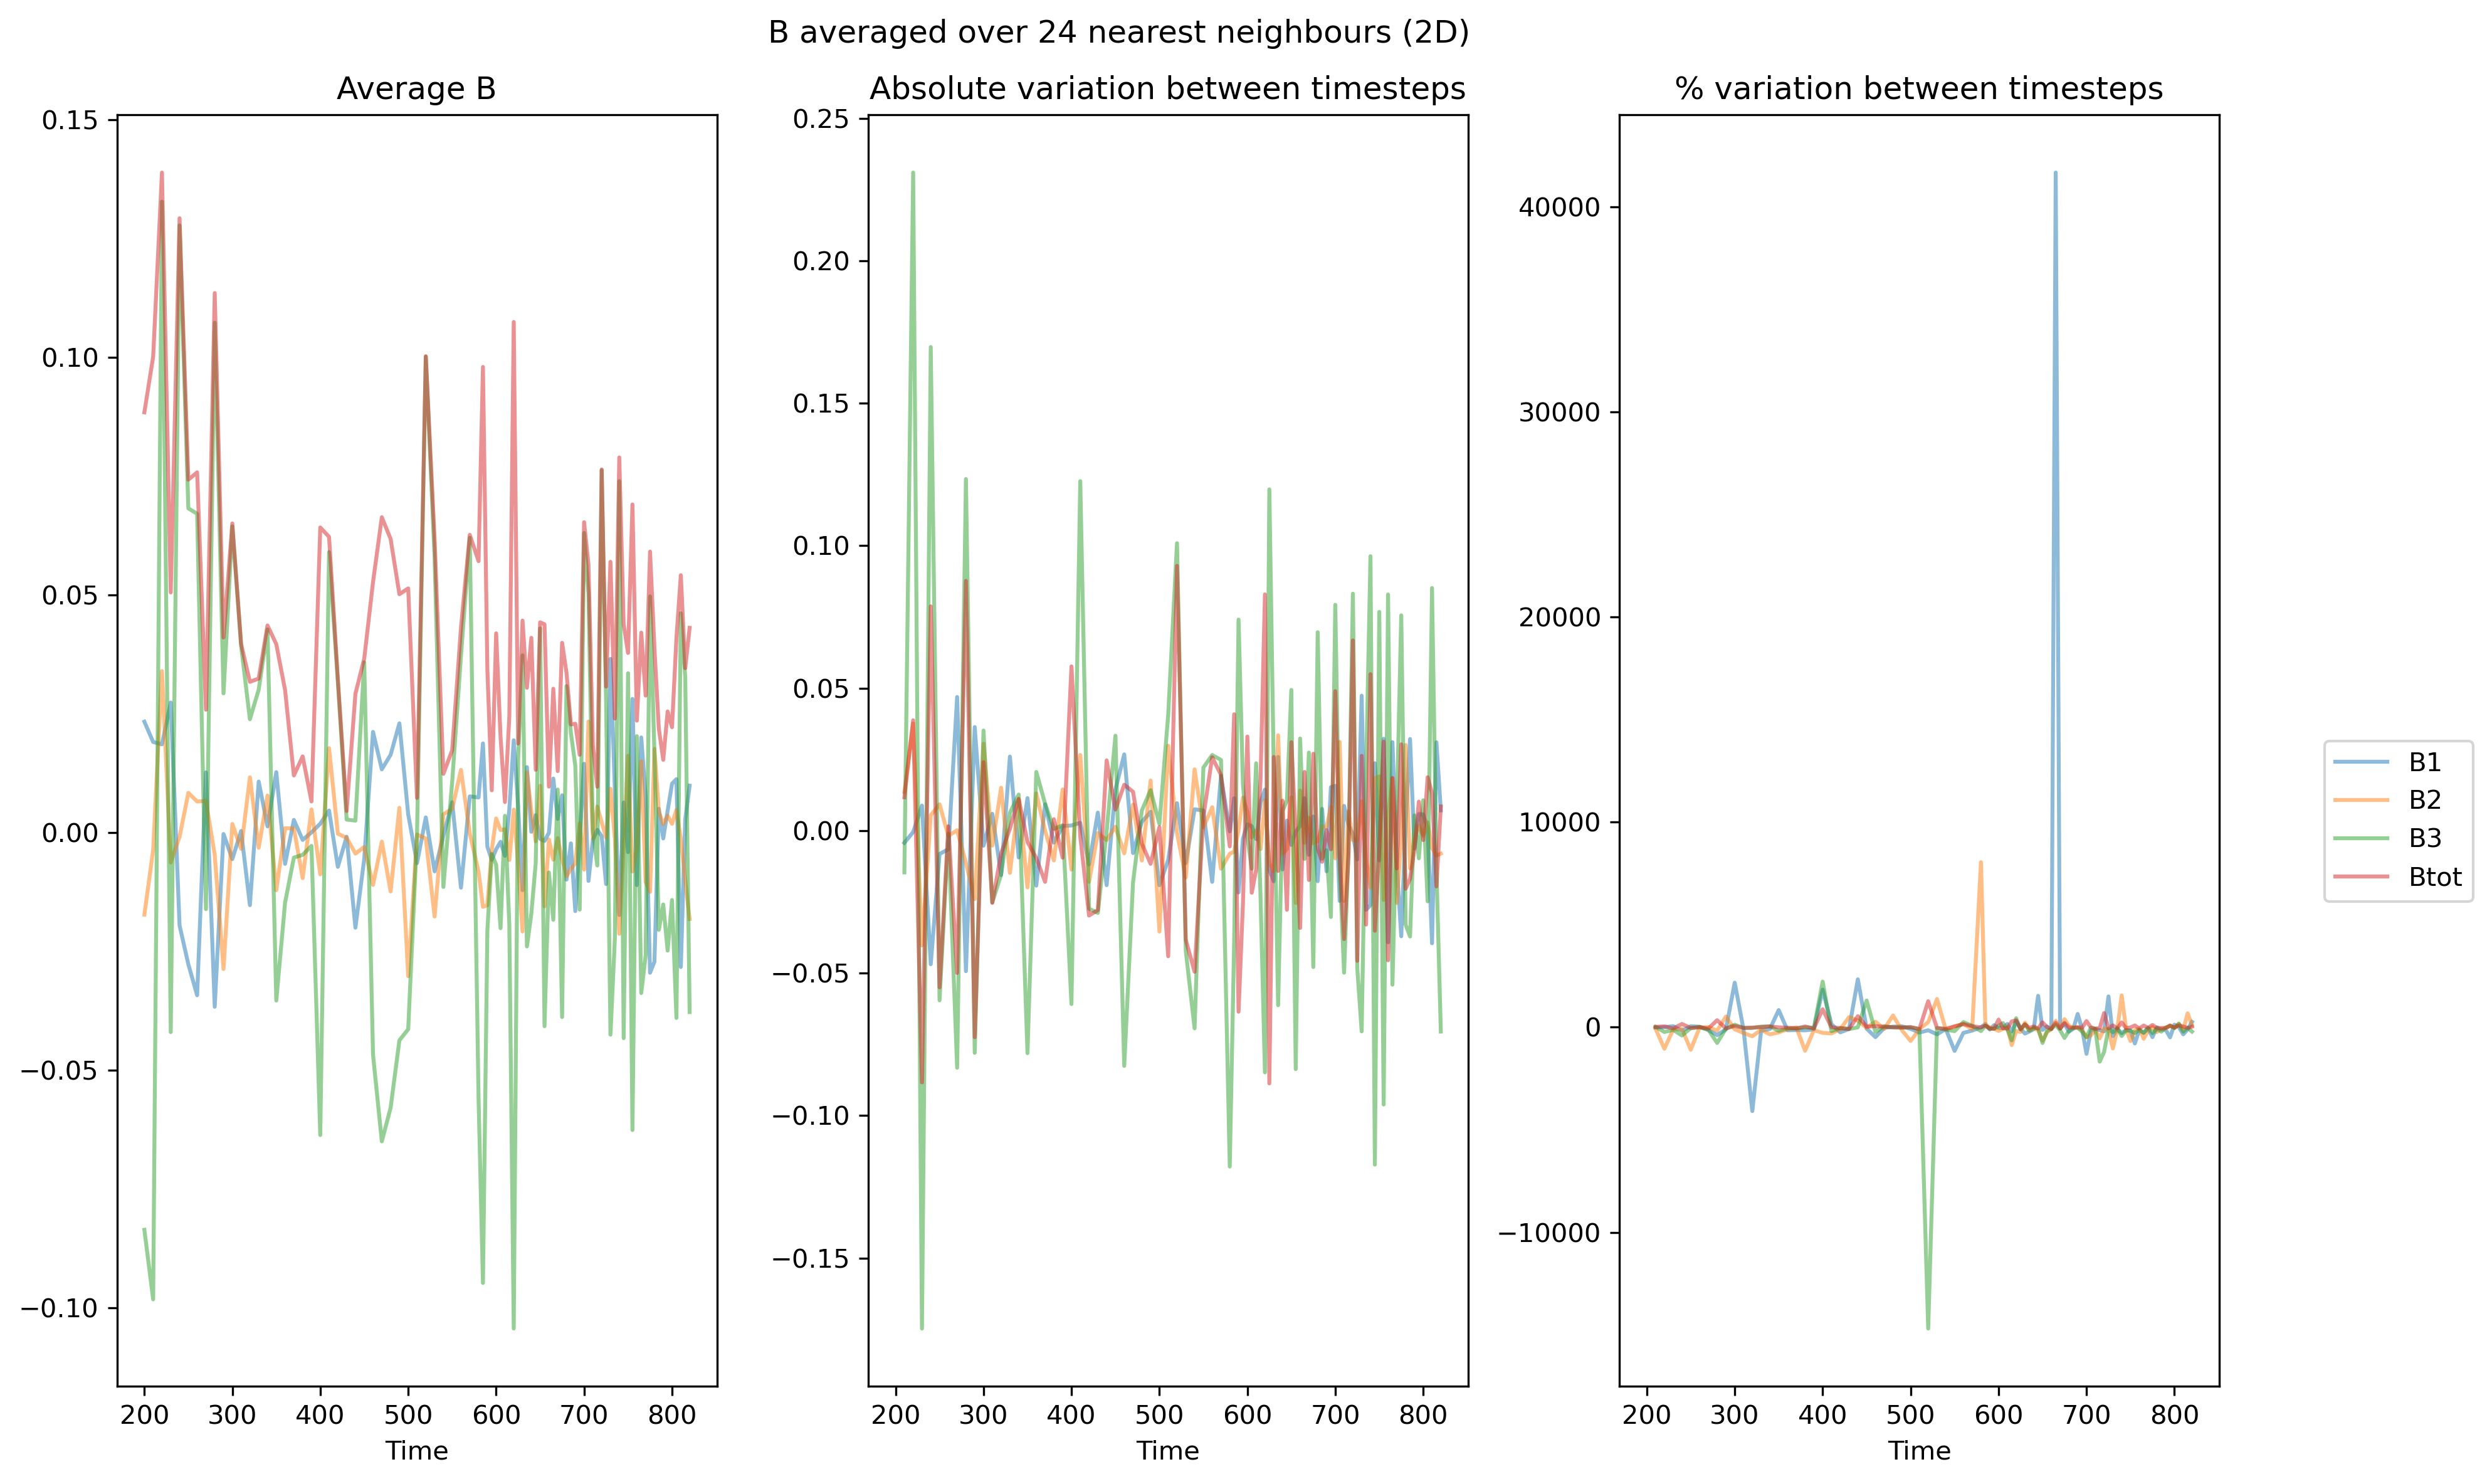

In [7]:
reduce = 1

fig, ax = plt.subplots(nrows=1,ncols=3,sharey='none',sharex='all',figsize=(12,8), dpi= 300)
make_subplot_i(ax[0],time,data['raw']['2d'],reduce)
make_subplot_i(ax[1],time[1:],data['diff']['2d'],reduce)
make_subplot_i(ax[2],time[1:],data['prop_diff']['2d'],reduce)

ax[0].set_title('Average B')
ax[1].set_title('Absolute variation between timesteps')
ax[2].set_title('% variation between timesteps')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 0.5), loc='upper right', borderaxespad=0.)
fig.suptitle('B averaged over 24 nearest neighbours (2D)')
fig.tight_layout()

A step down in quality from the two previous, not entirely unexpected since we're neglecting any contributions from the vertical ($\theta$) direction in this average. The initial magnetic field configuration contains vertical loops, so this averaging method is effectively random.

#### 124 nearest neighbours in 3D

Now we give equal weight to all immediate neighbours in all directions.

```python
def neighbor_average_convolve3d(x,nn):
    root = nn ** (1./3)
    dim = int(root)
    kernel = np.ones((dim, dim, dim))
    kernel[1, 1, 1] = 0
    neighbor_sum = convolve(x, kernel, mode='same')
    num_neighbor = convolve(np.ones(x.shape), kernel, mode='same')
    return neighbor_sum / num_neighbor

B_3d = neighbor_average_convolve3d(B[:,:,:],124)
B3d = B_3d[r_id,th_id,ph_id] #select single pixel to analyse
```

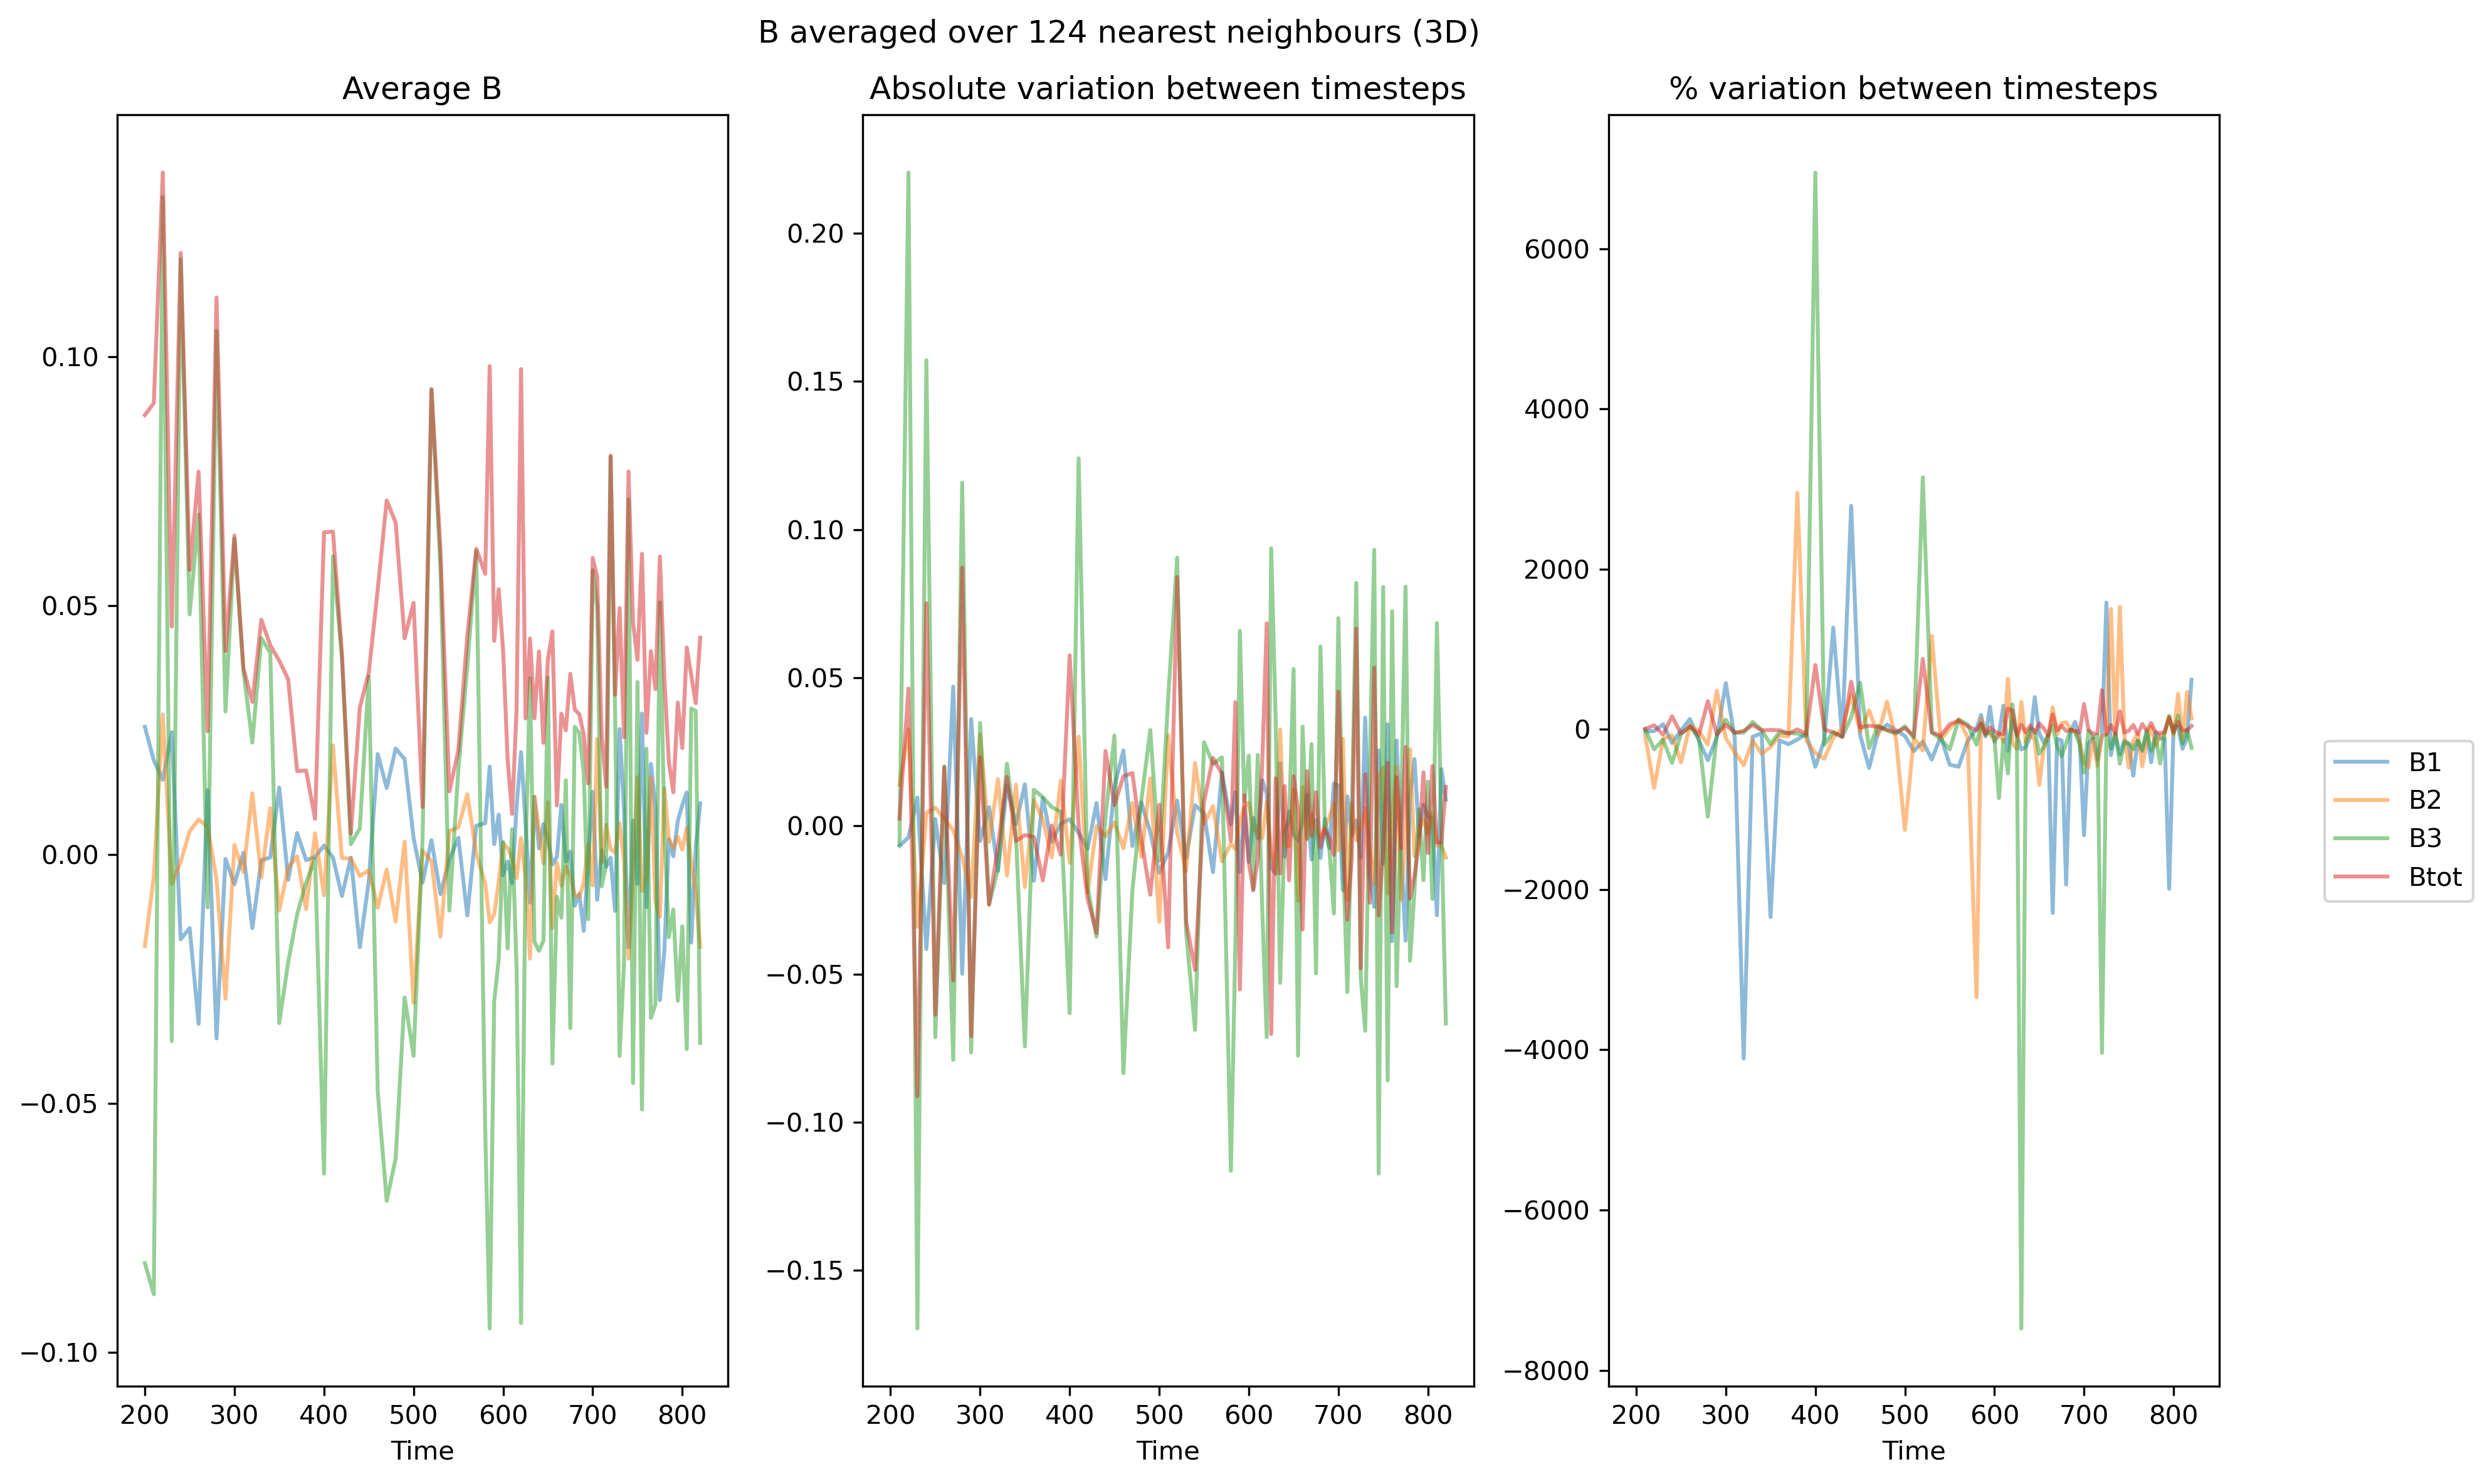

In [8]:
reduce = 1

fig, ax = plt.subplots(nrows=1,ncols=3,sharey='none',sharex='all',figsize=(12,8), dpi= 300)
make_subplot_i(ax[0],time,data['raw']['3d'],reduce)
make_subplot_i(ax[1],time[1:],data['diff']['3d'],reduce)
make_subplot_i(ax[2],time[1:],data['prop_diff']['3d'],reduce)

ax[0].set_title('Average B')
ax[1].set_title('Absolute variation between timesteps')
ax[2].set_title('% variation between timesteps')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 0.5), loc='upper right', borderaxespad=0.)
fig.suptitle('B averaged over 124 nearest neighbours (3D)')
fig.tight_layout()

Looks quite similar to the 2D case above at a first glance, but there's marked difference in the percentage variation on the left. We're no longer subjected to the really massive spikes seen in the other methods. And since we're only looking at the 124 nearest neighbours out of a total $256^3 = 16,777,216$, we're nowhere near the rough handedness of the first 2 broad averaging methods. If anything, this method could stand to use a few more neighbours. 

### Slow Feature Analysis

Slow Feature Analysis (SFA) is an unsupervised machine learning algorithm used to extract slowly varying signals from quickly-varying input data. Here, I am following the same method given in [this example](http://mdp-toolkit.sourceforge.net/examples/logmap/logmap.html#logmap) from the MDP documentation.

The original data files are much too large and take too long to read in for the purposes of this notebook, so instead I will show the SFA process using some prepared data.

First, we need to load [`h5py`](https://docs.h5py.org/en/stable/index.html). This will allow us to read hdf5 files. Once we read in our data, we should check what it contains by looping through the contained datasets. 

In [9]:
import h5py
import numpy as np
import mdp
import matplotlib.pyplot as plt

f = h5py.File('data/data_B.h5', 'r')

print(f"file object f has keys: {list(f.keys())}\n")

B = 'Btot'
dset = f[B]
print(f"dataset {B} contains: {list(dset)}\n")
print(f"dataset {B} has attributes: {list(dset.attrs.items())}")

file object f has keys: ['B1', 'B2', 'B3', 'Btot']

dataset Btot contains: [7.914514e-05, 0.0070025222, 0.07289576, 0.029556792, 0.11167884, 0.08792526, 0.053856928, 0.045229834, 0.11152293, 0.08604393, 0.04851789, 0.0925798, 0.039412968, 0.032843392, 0.010793798, 0.072998576, 0.0440892, 0.05773981, 0.053476244, 0.063075624, 0.08962577, 0.020015799, 0.086010575, 0.014095439, 0.106733665, 0.10188254, 0.024951732, 0.011875625, 0.05093954, 0.015343578, 0.06001628, 0.0977523, 0.015084747, 0.078816704, 0.08608147, 0.09286089, 0.038436677, 0.006316046, 0.021838771, 0.03720189, 0.0453001, 0.056697704, 0.08211579, 0.08279176, 0.006044837, 0.036566578, 0.10050829, 0.028804211, 0.044425815, 0.045921627, 0.038871143, 0.0323231, 0.05788293, 0.05282887, 0.035890654, 0.016425474, 0.03771089, 0.051192105, 0.050429, 0.017047627, 0.041255098, 0.10991449, 0.064553775, 0.02988099, 0.016827144, 0.05113094, 0.09823249, 0.10192924, 0.04963707, 0.06558694, 0.07656308, 0.06345222, 0.038589627, 0.031775888, 0.

So our file contains lists of magnetic field data for a single pixel over time. The components B1, B2, B3, and Btot correspond to the $r$, $\theta$, and $\phi$ components plus the magnitude $B_{\rm tot} = \sqrt{B_r^2 + B_{\theta}^2 + B_{\phi}^2}$. We are also given the $r$, $\theta$, and $\phi$ coordinates for this pixel. The coordinates given indicate that the pixel lies approximately in the plane of the disk ($\theta\sim \pi/2$) and at a reasonably low radius ($r=20$).



Now we can instantiate and train our SFA model to the data.

In [11]:
entries = ['average','diff','prop_diff']
dset_new = {}
for entry in entries:
    dset_new[entry] = {}
    
for B in ['B1','B2','B3','Btot']:
    dset = f[B]

    bt = np.asarray([list(dset)])
    bt = bt.T 

    series_length = np.size(bt)
    nodes = 6
    poly_dim = 3

    flow = (mdp.nodes.EtaComputerNode() +
            mdp.nodes.TimeFramesNode(nodes) +
            mdp.nodes.PolynomialExpansionNode(poly_dim) +
            mdp.nodes.SFANode(output_dim=1) +
            mdp.nodes.EtaComputerNode() )

    flow.train(bt)
    slow = flow(bt)

    slow = slow.flatten()
    padded_slow = np.concatenate([[slow[0]], [slow[0]], 
                                  slow, 
                                  [slow[-1]], [slow[-1]], [slow[-1]]])
    
    dset_new['average'][B] = padded_slow
    dset_new['diff'][B] = [j-i for i, j in zip(padded_slow[:-1], padded_slow[1:])]
    dset_new['prop_diff'][B] = [((100.*(j-i))/i) for i, j in zip(padded_slow[:-1], padded_slow[1:])]

Going through each step above,

1. First we transpose the data so it's in the vertical form needed for the training algorithm

```python
bt = np.asarray([list(dset)])
bt = bt.T 
```

2. Then we define some values for use in the SFA algorithm. ```nodes``` is the number of time-delayed copies of ```bt``` we add to itself to make a matrix. ```poly_dim``` is the polynomial order of the space to expand into; with a ```poly_dim=3``` we're doing a cubic expansion.

```python
series_length = np.size(bt)
nodes = 6
poly_dim = 3
```

3. Now we instantiate our model, combining multiple steps in one go. The ```EtaComputerNode()``` at the beginning and end allows us to compare the slowness of the data before and after SFA. ```TimeFramesNode()``` adds our ```nodes``` time-delayed copies. ```PolynomialExpansionNode``` performs the polynomial expansion in ```poly_dim``` dimensions. And finally, ```SFANode``` performs the SFA operation.

```python
flow = (mdp.nodes.EtaComputerNode() +
        mdp.nodes.TimeFramesNode(nodes) +
        mdp.nodes.PolynomialExpansionNode(poly_dim) +
        mdp.nodes.SFANode(output_dim=1) +
        mdp.nodes.EtaComputerNode() )
```

4. Train the model with the data

```python
flow.train(bt)
```

5. Apply the model to the data and pull out the slowest feature

```python
slow = flow(bt)
```

Now we can plot the result:

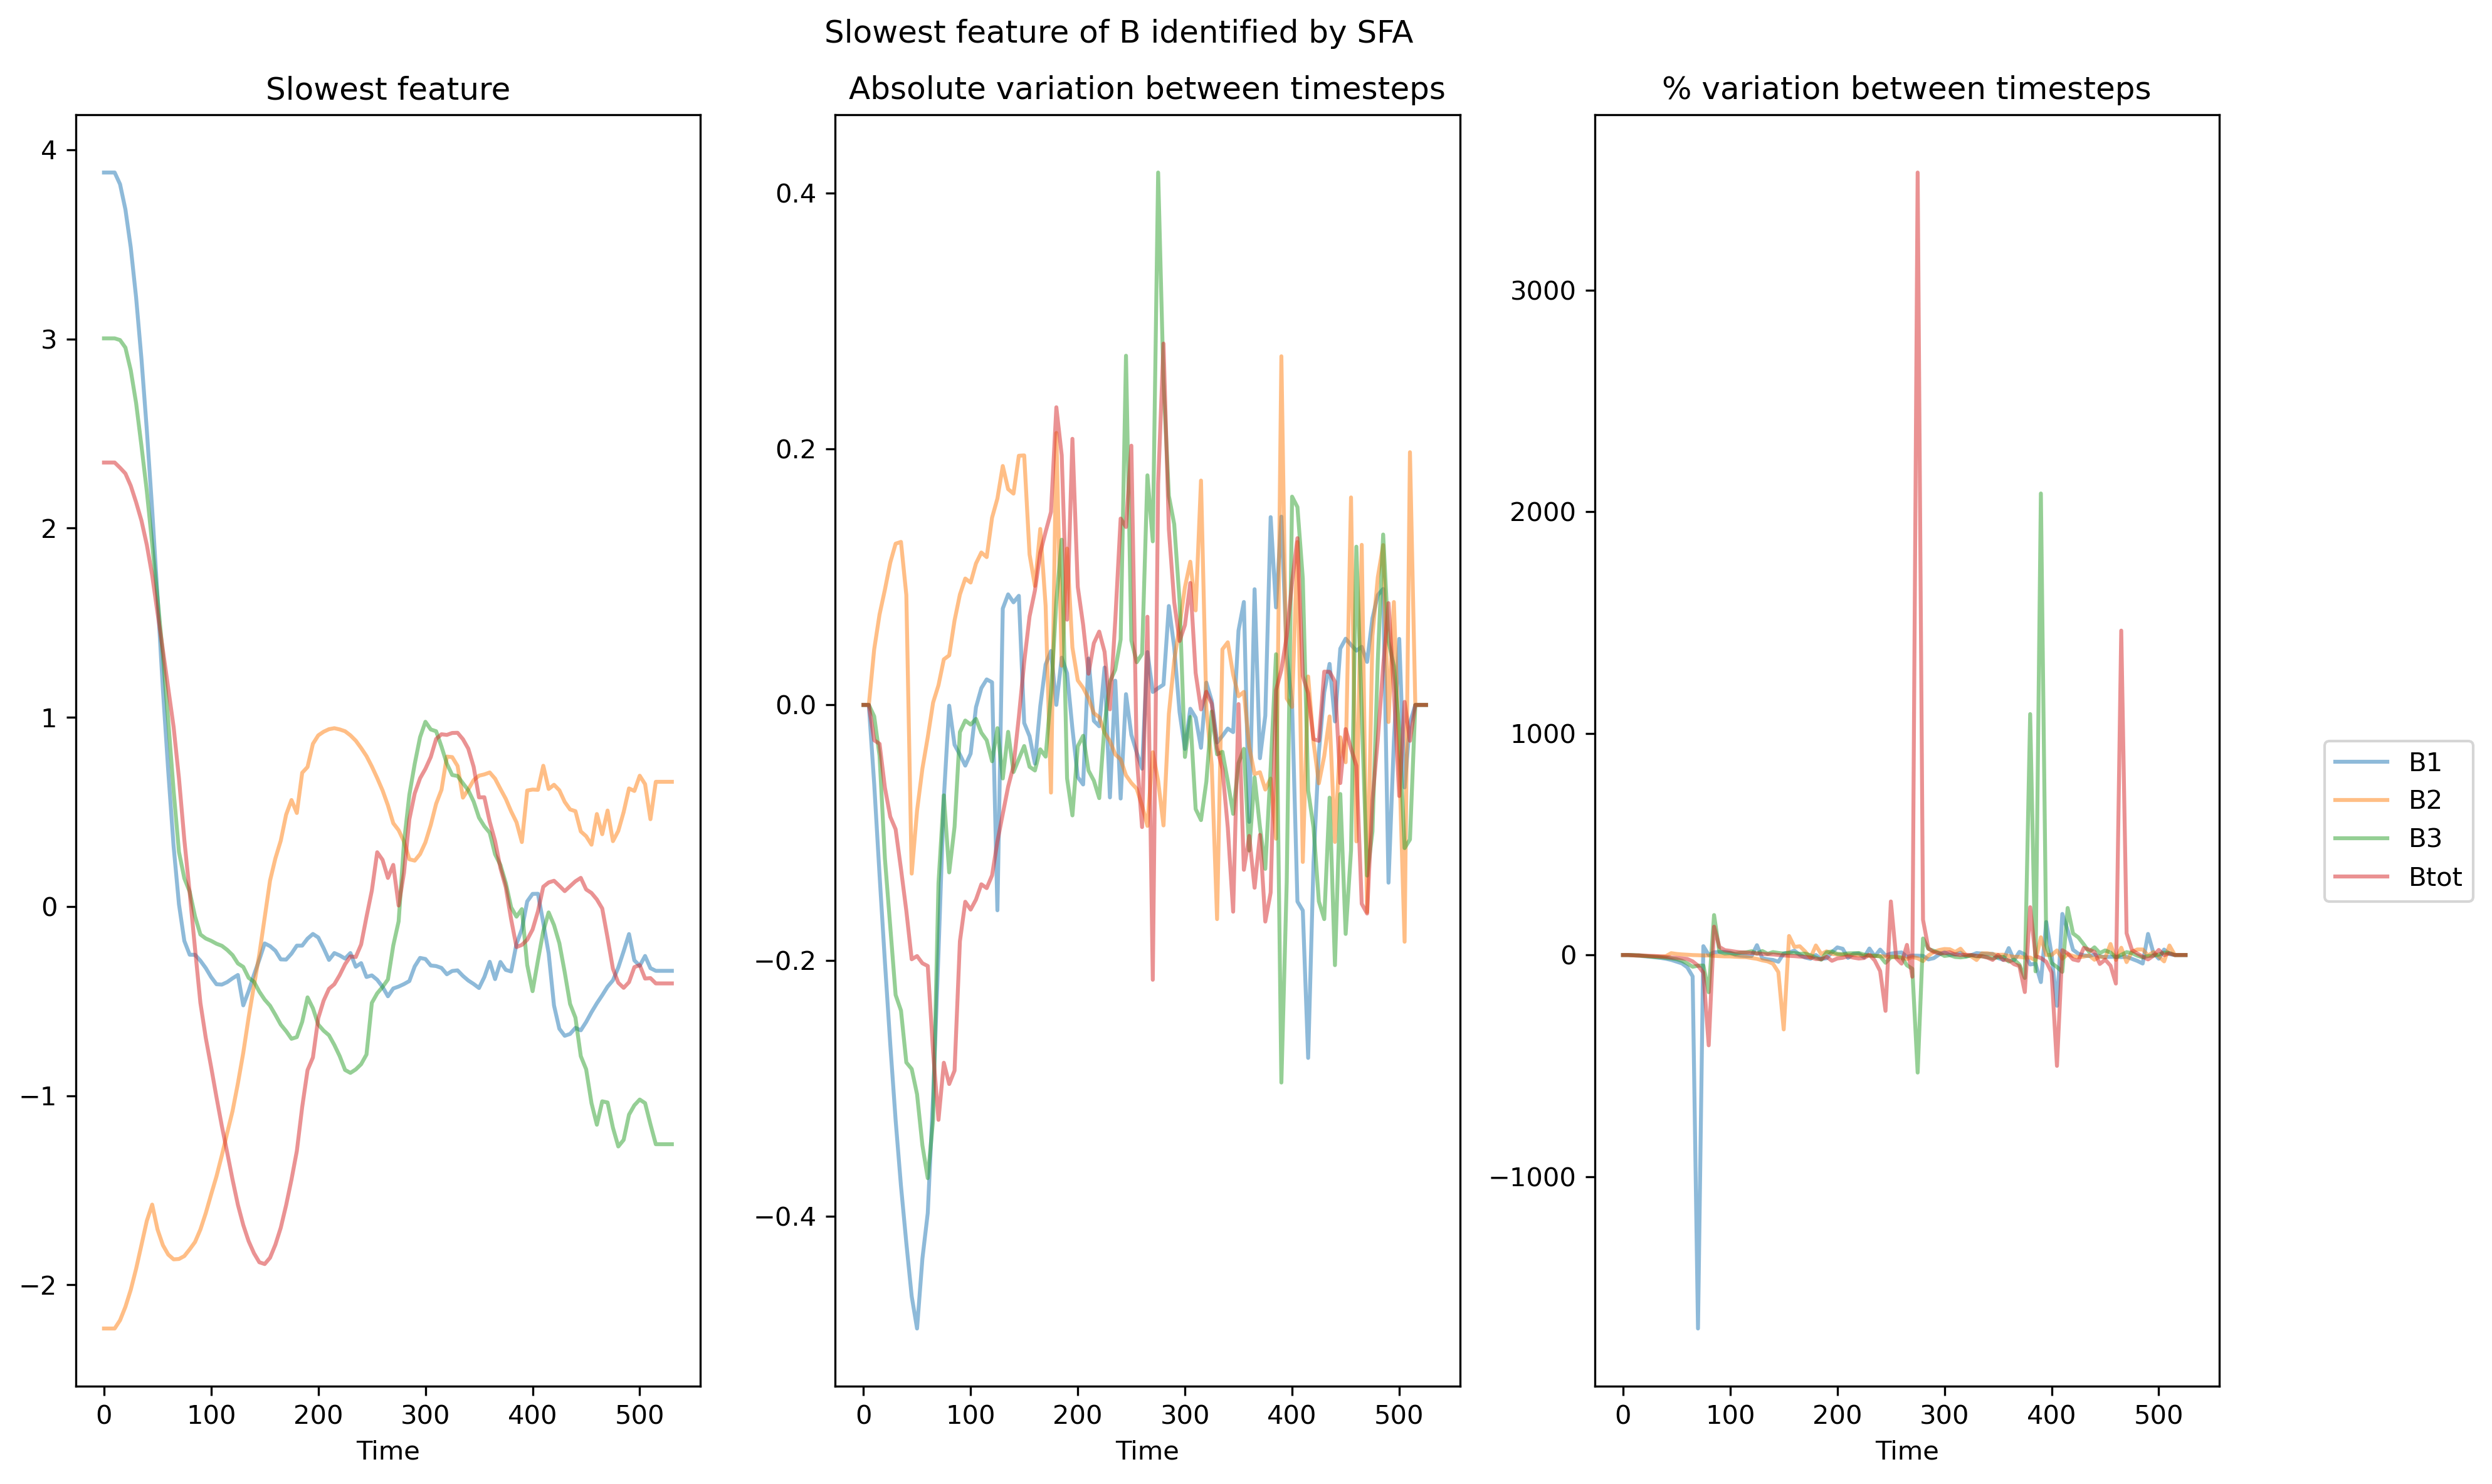

In [12]:
reduce=0
fig, ax = plt.subplots(nrows=1,ncols=3,sharey='none',sharex='all',figsize=(12,8), dpi= 300)
make_subplot_i(ax[0],5.*np.arange(series_length),dset_new['average'],reduce)
make_subplot_i(ax[1],5.*np.arange(series_length-1),dset_new['diff'],reduce)
make_subplot_i(ax[2],5.*np.arange(series_length-1),dset_new['prop_diff'],reduce)

ax[0].set_title('Slowest feature')
ax[1].set_title('Absolute variation between timesteps')
ax[2].set_title('% variation between timesteps')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 0.5), loc='upper right', borderaxespad=0.)
fig.suptitle('Slowest feature of B identified by SFA')
fig.tight_layout()

Here, I have not reduced the amount being plotted since I performed SFA on the entire dataset, but we can clearly see the effect the initial data points have, especially on the left and centre plots. Once I have significantly more data from my simulation, it would be a good idea to drop the initial times for SFA fitting. Despite their inclusion, we can see that Btot has now been brought in line with the components. 

The feature identified by SFA also has the lowest % variation between each step of any of the methods tried in this workbook! It's an especially large change to the 'broad' averaging methods, which are currently the standard in the field.

We can see this more clearly by using a violinplot:

In [13]:
def concatenate_B(dset):
    B1 = np.reshape(dset['B1'], (106,1))
    B2 = np.reshape(dset['B2'], (106,1))
    B3 = np.reshape(dset['B3'], (106,1))
    concat = np.concatenate((B1,B2,B3), axis=1)
    return concat

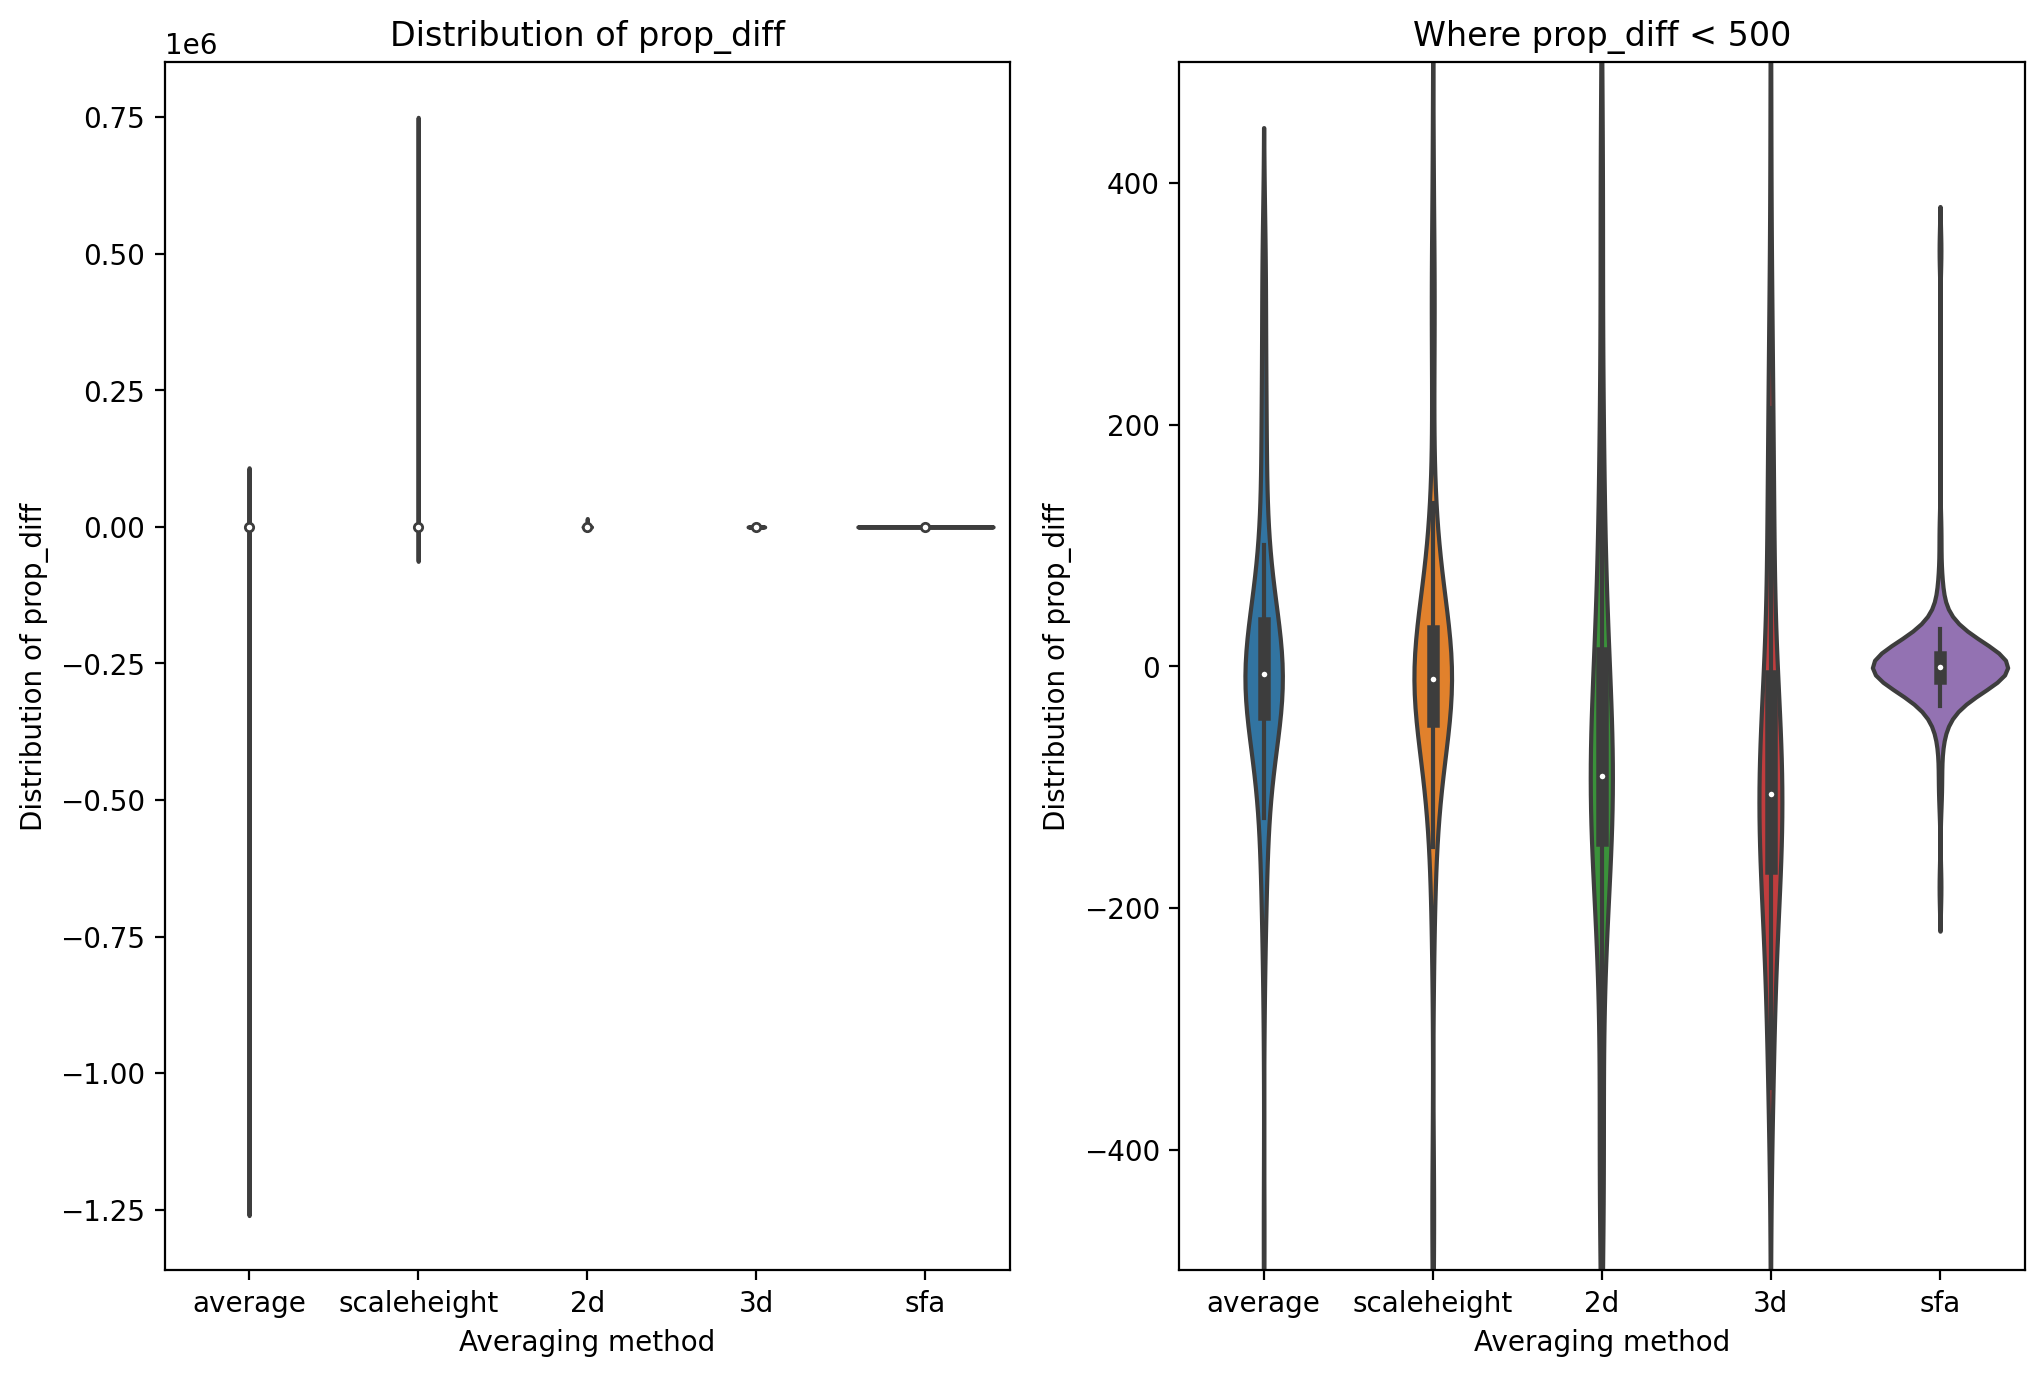

In [14]:
import seaborn as sns

# take the average prop_diff for all the components
all_prop_diff = {}
all_prop_diff['sfa'] = np.average(concatenate_B(dset_new['prop_diff']), axis=1);
all_prop_diff['average'] = np.average(concatenate_B(data['prop_diff']['average']), axis=1);
all_prop_diff['scaleheight'] = np.average(concatenate_B(data['prop_diff']['scaleheight']), axis=1);
all_prop_diff['2d'] = np.average(concatenate_B(data['prop_diff']['2d']), axis=1);
all_prop_diff['3d'] = np.average(concatenate_B(data['prop_diff']['3d']), axis=1);

dset = {"average": {"prop_diff": all_prop_diff['average'][1:]},
        "scaleheight": {"prop_diff": all_prop_diff['scaleheight'][1:]},
        "2d": {"prop_diff": all_prop_diff['2d'][1:]},
        "3d": {"prop_diff": all_prop_diff['3d'][1:]},
        "sfa": {"prop_diff": all_prop_diff['sfa'][1:]}}

# create a dataframe that seaborn can use
df = pd.DataFrame(columns = ['Averaging method', 'prop_diff']);
for key, value in dset.items():
    b_df = pd.DataFrame({'Averaging method': [key]*len(value['prop_diff']), 'prop_diff': value['prop_diff']});
    df = df.append(b_df, ignore_index = True);
df = pd.melt(frame=df,
             id_vars='Averaging method',
             value_vars=['prop_diff'],
             var_name='type',
             value_name='Distribution of prop_diff');
df['Distribution of prop_diff'] = df['Distribution of prop_diff'].astype(float);

fig, ax = plt.subplots(1,2,figsize=(12,8), dpi= 200)
sns.violinplot(ax=ax[0],data=df,x='Averaging method',y='Distribution of prop_diff');
mask = (df['Distribution of prop_diff']<500) & (df['Distribution of prop_diff']>-500)
sns.violinplot(ax=ax[1],data=df[mask],x='Averaging method',y='Distribution of prop_diff');
ax[1].set_ylim(-500, 500);
ax[0].set_title('Distribution of prop_diff')
ax[1].set_title('Where prop_diff < 500')
plt.show()

The left-hand plot isn't too illuminating because there's too wide a range, but we can see the difference when we zoom in (right-hand). ```sfa``` has a near zero mean, a comparatively small range, and relatively few outliers.

And we can also check our $\eta$ values from above to quantify the change in "slowness" between our original data and the identified slowest feature:

In [15]:
print(f'Eta value (time series): {flow[0].get_eta(t=1)}')
print(f'Eta value (slow feature): {flow[-1].get_eta(t=1)}')

Eta value (time series): [0.20396385]
Eta value (slow feature): [0.02013503]


So the slowest feature found is roughly 10 times slower than the original data!

## Future work

The SFA method seems to work well at identifying slowly varying features in the data, but it currently only works for a single pixel, which is likely not representative of the entire disk.

To make this more robust, I need to expand the model into 3 spatial dimensions. SFA suffers from the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) so it would not be possible to apply a single SFA node to the entire disk. Instead, I will first need to reduce the number of cells being analysed through Principle Component Analysis (PCA) and then apply SFA within a heirarchical network. 

## Useful references

 - [Slow feature analysis](http://www.scholarpedia.org/article/Slow_feature_analysis#Historical)
 
 - The documentation for [MDP](http://mdp-toolkit.sourceforge.net/index.html)
 
 - [A quick introduction to Slow Feature Analysis](https://towardsdatascience.com/a-brief-introduction-to-slow-feature-analysis-18c901bc2a58)